# Project Description: Prioritizing Hypothesis and A/B Testing Analysis

*You are an **analyst** at a large online store. You and your marketing team have **compiled a list of hypotheses** to help **increase revenue**. The lists are:*

1. **Add two new channels** for attracting traffic. This will bring **30% more users**
2. **Launch** your own **delivery service**. This will **shorten delivery time**
3. **Add product recommendation blocks** to the store's site. This will **increase conversion and average purchase size**
4. **Change the category structure**. This will **increase conversion** since users will find the products they want more quickly
5. **Change the background color** on the main page. This will **increase user engagement**
6. **Add a customer review page**. This will **increase the number of orders**
7. **Show banners with current offers and sales** on the main page. This will **boost conversion**
8. **Add a subscription form** to all the main pages. This will help you compile a **mailing list**
9. **Launch a promotion** that gives users **discounts on their birthdays**

*Hypothesis testing requires substantial funding, while the resources you have may be limited. This is a natural thing to happen. Therefore, you must be able to **determine** which hypotheses need to be **tested** and which hypotheses should be **removed** first. In order to maximize growth in key business metrics, the hypotheses you formulate should be **prioritized**.*

*Your supervisor want you to implement a **framework to prioritize** hypotheses. Impact, confidence, and effort or **ICE** for short, are among the most popular methods used to prioritize problems. There is also a modified version of ICE, namely **RICE**.*

*RICE consists of four components, namely:*

- **Reach** — how **many** users will be affected by the update you want to introduce
- **Impact** — how **strongly** the update will **affect** users, their experience, and their satisfaction with the product
- **Confidence** — how **confident** you are that your product **will influence** users in the way you introduce it
- **Effort** — how much it **costs** to test a hypothesis

*During the brainstorming session, all departments involved have given their assessment of each parameter for each hypothesis. These values are then averaged on a scale of 1-10 and compiled on /datasets/hypotheses_us.csv.*

*After prioritizing hypothesis, UX Research team will conduct the A/B testing based on the selected hypothesis and the results will be compiled on /datasets/orders_us.csv and /datasets/visits_us.csv.*

**Project Instructions**

1. ***Prioritizing Hypotheses***

- *The file hypotheses_us.csv contains nine hypotheses for increasing the income of an online store with Reach, Impact, Confidence, and Effort predefined for each of the hypotheses. your tasks are:*
    - Implement an `ICE` framework to prioritize hypotheses. Sort those hypotheses in descending order of priority.
    - Implement a `RICE` framework to prioritize hypotheses. Sort those hypotheses in descending order of priority.
    - Indicates the change in the priority of the hypothesis when `RICE` applied to replace `ICE`. Provide an explanation for the change.

2. ***A/B Testing Analysis***
- Describe **cumulative income by group**. Make the conclusions and assumptions.
- Draw a **cumulative average order size by group**. Make the conclusions and assumptions.
- Draw a **relative difference** for the **cumulative average order size** of **group B compared to group A**. Make conclusions and assumptions.
- Calculate the **conversion rate of each cohort** as the ratio of orders to the number of visits each day.
- **Graph the daily conversion rates** of both groups and explain the differences. Make the conclusions and assumptions.
- Create a **scatter chart for the number of orders per user**. Make the conclusions and assumptions.
- Calculate the **95th and 99th percentiles** for the **number of orders per user**. Determine the point at which a data point turns into an anomaly.
- Create a **scatter chart for the order revenue**. Make the conclusions and assumptions.
- Calculate the **95th and 99th percentiles** for the **order revenue**. Determine the point at which a data point turns into an anomaly.
- Find the **statistical significance of conversion differences** between groups using **raw data**. Make the conclusions and assumptions.
- Find the **statistical significance of the difference in average order size** between groups using **raw data**. Make the conclusions and assumptions.
- Find the **statistical significance of conversion differences** between groups using **filtered data**. Make the conclusions and assumptions.
- Find the **statistical significance of the difference in average order size** between groups using **filtered data**. Make the conclusions and assumptions.
- Make a **decision** based on the test results. Possible decisions are:
    - **Stop testing**, as well as **consider one of the groups as a leader**.
    - **Stop the test**, as well as **conclude that there is no difference** between the two groups.
    - **Continue testing**.

**Project Evaluation**

*Here are the things that project reviewers consider in assessing your project:*

- How you prepare data for analysis;
- How do you formulate a hypothesis;
- How do you interpret the resulting graph;
- How do you calculate statistical significance;
- What conclusions do you make based on the A/B testing results obtained;
- Do you follow the structure of the project and keep the code tidy;
- Do you make comments on each step;
- Conclusions you made.

# Data dictionary

**The hypotheses table:**
- `Hypotheses` — brief descriptions of the hypotheses
- `Reach` — user reach, on a scale of one to ten
- `Impact` — impact on users, on a scale of one to ten
- `Confidence` — confidence in the hypothesis, on a scale of one to ten
- `Effort` — the resources needed to test a hypothesis, on a scale of one to ten. The higher the `Effort` value, the more resources are required for the test.

**The orders table:**
- `transactionId` — order identifier
- `visitorId` — identifier of the user who placed the order
- `date` — order date
- `revenue` — order revenue
- `group` — the A/B testing group the user belongs to

**The visits table:**
- `date` — date
- `group` — A/B testing group
- `visits` — the number of visits on the specified date for the specified A/B test group

## **Data Preparation**

In [1]:
# importing libraries
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data loading
df_hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
df_orders = pd.read_csv('/datasets/orders_us.csv', sep=',')
df_visits = pd.read_csv('/datasets/visits_us.csv', sep=',')

### Dataframe Hypotheses

In [3]:
# general information
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# metric information
df_hypotheses.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [5]:
# dataframe size
df_hypotheses.shape

(9, 5)

In [6]:
# looking at the first rows of the df_orders dataframe
df_hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


*The table `hypotheses` include all of available hypotheses to be evaluated. In later section, we will conducting hypothesis prioritizing using ICE and RICE framework and compare between the two.*

In [7]:
# checking column names
df_hypotheses.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [8]:
# putting column names in lower case
df_hypotheses.columns = df_hypotheses.columns.str.lower()
df_hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

In [9]:
# general information again
df_hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [10]:
# metric information again
df_hypotheses.describe()

,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [11]:
# checking for duplicate data
df_hypotheses.duplicated().sum()

0

In [12]:
# checking for duplicate data
df_hypotheses.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

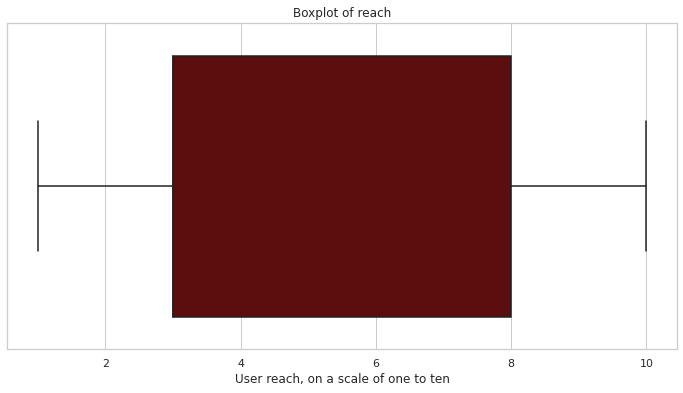

In [13]:
# boxplot of the reach column 
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hypotheses, x='reach')
plt.title('Boxplot of reach')
plt.xlabel('User reach, on a scale of one to ten')
plt.show()

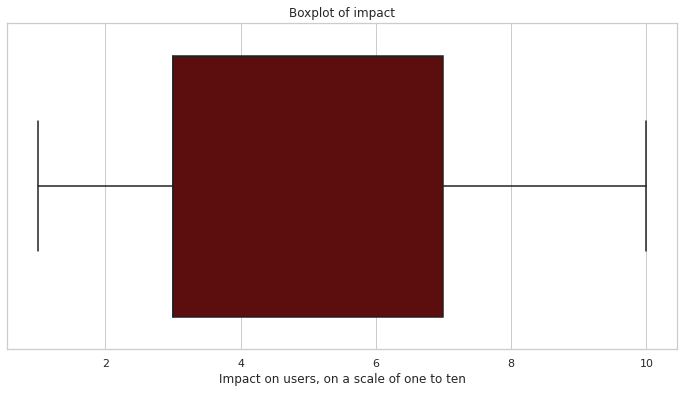

In [14]:
# boxplot of the impact column 
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hypotheses, x='impact')
plt.title('Boxplot of impact')
plt.xlabel('Impact on users, on a scale of one to ten')
plt.show()

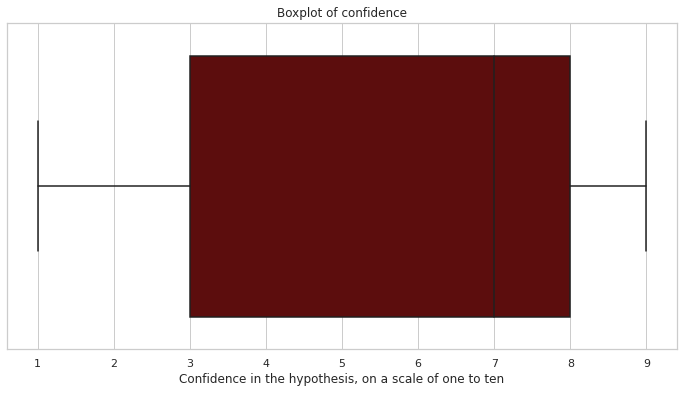

In [15]:
# boxplot of the confidence column 
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hypotheses, x='confidence')
plt.title('Boxplot of confidence')
plt.xlabel('Confidence in the hypothesis, on a scale of one to ten')
plt.show()

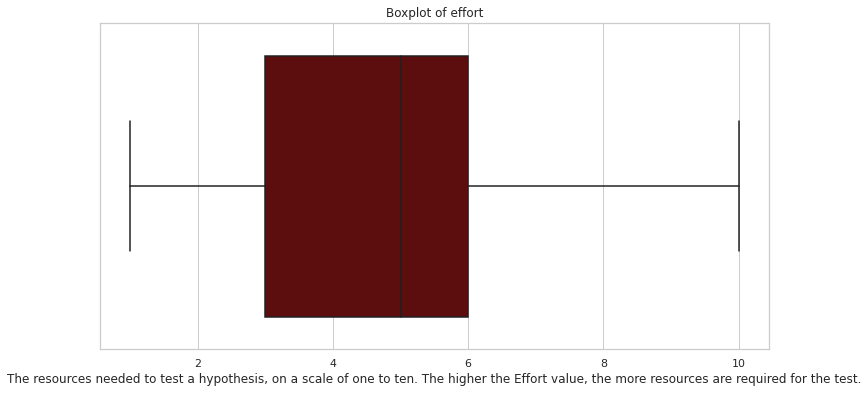

In [16]:
# boxplot of the effort column 
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_hypotheses, x='effort')
plt.title('Boxplot of effort')
plt.xlabel('The resources needed to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resources are required for the test.')
plt.show()

**Overview do dataframe df_hypotheses:**
- *there are five columns `hypothesis`, `reach`, `impact`, `confidence` and `effort`, all have 9 rows*;
- *the `hypothesis` column is of type object, the `reach`, `impact`, `confidence` and `effort` columns are of type int64*;
- *there is no big difference between the mean and median*;
- *no duplicate data in the dataframe*;
- *no missing data in dataframe*;
- *there are no outliers in the `reach`, `impact`, `confidence` and `effort` columns*.

### Dataframe Orders

In [17]:
# general information
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [18]:
# metric information
df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [19]:
# dataframe size
df_orders.shape

(1197, 5)

In [20]:
# looking at the first rows of the df_orders dataframe
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [21]:
# checking column names
df_orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [22]:
# putting column names in lower case
df_orders.columns = df_orders.columns.str.lower()
df_orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [23]:
# renaming the transactionid and visitorid columns
df_renamed = df_orders.rename(columns={'transactionid':'transaction_id', 'visitorid': 'visitor_id'}, inplace=True)

In [24]:
# checking the format
df_orders.date.dtypes

dtype('O')

In [25]:
# changing the format
df_orders['date'] = pd.to_datetime(df_orders['date'], format="%Y.%m.%d")

In [26]:
# general information again
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [27]:
# metric information again
df_orders.describe()

,transaction_id,visitor_id,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [28]:
# checking group A revenue
df_orders[df_orders['group'] == 'A']['revenue'].describe()

count     557.000000
mean      115.897487
std       182.358918
min         5.000000
25%        20.400000
50%        50.100000
75%       130.500000
max      1450.200000
Name: revenue, dtype: float64

In [29]:
# # checking group B revenue
df_orders[df_orders['group'] == 'B']['revenue'].describe()

count      640.000000
mean       145.063438
std        806.992326
min          5.100000
25%         24.050000
50%         50.350000
75%        130.225000
max      19920.400000
Name: revenue, dtype: float64

*Before all data aggregation and analysis, we can see that group B, the sample group, have higher average (145.3 compared to 113.7) but lower median (45.9 compared to 50.1) of revenue than group A, the control group.*

#### Removing Stacked Data

*During the preparation, we were warned that there is a possibility of user that included in both group. Remember that one of the criteria for effective A/B testing are:*

- The user remains within his or her group until the end of the test. If a user sees a different version of a website page during the testing process, the version used for decision-making will be unclear, and the credibility of the research results will be threatened.

*Therefore, we must remove the row with user ID that exist in both group*

In [30]:
# checking the IDs that are in both groups
visitor_id_A = df_orders[df_orders['group'] == 'A']['visitor_id'].drop_duplicates()
visitor_id_B = df_orders[df_orders['group'] == 'B']['visitor_id'].drop_duplicates()

stacked_id = visitor_id_B[visitor_id_B.isin(visitor_id_A)]

print('Visitor ID that exist in both group:', len(stacked_id))

Visitor ID that exist in both group: 58


In [31]:
# lines that had IDs in both groups were removed
df_orders = df_orders[~df_orders['visitor_id'].isin(stacked_id)]
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   float64       
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


*We have remove 181 rows of 58 user ID that exist in both group. Let's check whether the code we made is working properly*

In [32]:
# checking if there are still IDs in both groups
visitor_id_A_filtered = df_orders[df_orders['group'] == 'A']['visitor_id'].drop_duplicates()
visitor_id_B_filtered = df_orders[df_orders['group'] == 'B']['visitor_id'].drop_duplicates()

stacked_id_filtered = visitor_id_B_filtered[visitor_id_B_filtered.isin(visitor_id_A_filtered)]

print('User ID that now exist in both group:', len(stacked_id_filtered))

User ID that now exist in both group: 0


In [33]:
# checking for unique values in group column
df_orders['group'].unique()

array(['B', 'A'], dtype=object)

In [34]:
# checking for duplicate data
df_orders.duplicated().sum()

0

In [35]:
# checking for duplicate data
df_orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

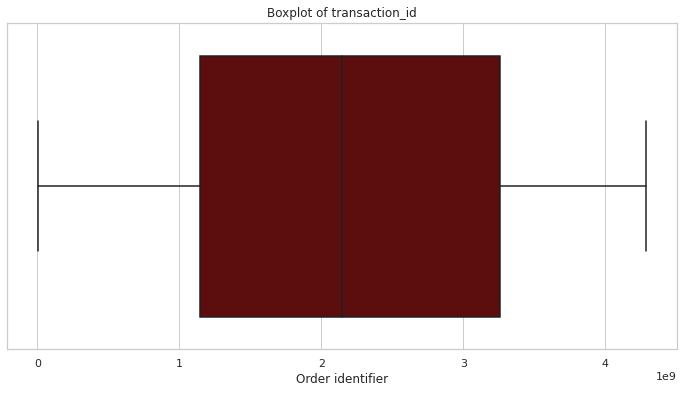

In [36]:
# boxplot of the transaction_id column
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orders, x='transaction_id')
plt.title('Boxplot of transaction_id')
plt.xlabel('Order identifier')
plt.show()

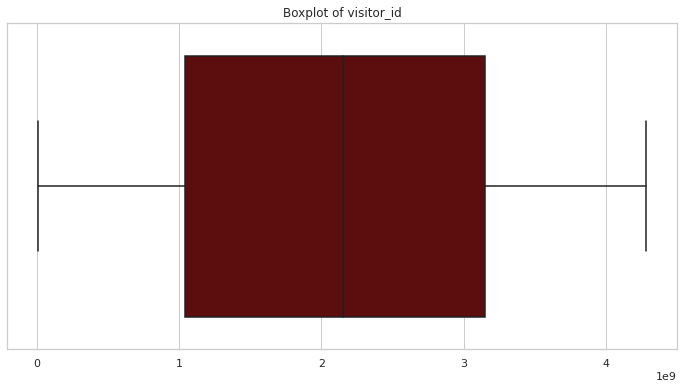

In [37]:
# boxplot of the visitor_id column
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_orders, x='visitor_id')
plt.title('Boxplot of visitor_id')
plt.xlabel('')
plt.show()

**Overview do dataframe df_orders:**

- *there are five columns `transaction_id`, `visitor_id`, `date`, `revenue` and `group`, all had 1197 rows, the stacked data was removed. Now all columns have 1016 rows*;
- *the `transaction_id` and `visitor_id` columns are of type int64, the `date` column is of type datetime64[ns], the `revenue` column is of type float64 and the `group` column is of type object*;
- *column name changed from `transactionId` to `transaction_id`*;
- column name changed from `visitorId` to `visitor_id`
- *the data type of the `date` column was changed from object to datetime*;
- *the average is more than doble the median in the `revenue` column*;
- *there is no big difference between the mean and median in the `visitor_id` column*;
- *no duplicate data in the dataframe*;
- *no missing data in the dataframe*;
- *there are no outliers in the `transaction_id` and `visitor_id` columns*.

### Dataframe Visits

In [38]:
# general information
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [39]:
# metric information
df_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [40]:
# dataframe size
df_visits.shape

(62, 3)

In [41]:
# looking at the first rows of the df_orders dataframe
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


*The table `visitors` carry the data of the amount of visitors for each group for each day during the A/B testing. As there is data for the whole month of August 2019 (31 days), there will be 62 rows with no missing value.*

In [42]:
# checking device type count
df_visits['group'].value_counts()

B    31
A    31
Name: group, dtype: int64

In [43]:
# checking column names
df_visits.columns

Index(['date', 'group', 'visits'], dtype='object')

In [44]:
# checking the format of the date column
df_visits.date.dtypes

dtype('O')

In [45]:
# changing the format of the end_ts column
df_visits['date'] = pd.to_datetime(df_visits['date'], format="%Y.%m.%d")

In [46]:
# general information again
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [47]:
# metric information again
df_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [48]:
# checking group A revenue
df_visits[df_visits['group'] == 'A'].describe()

,visits
count,31.000000
mean,604.387097
std,112.396227
min,361.000000
25%,541.000000
50%,619.000000
75%,705.000000
max,756.000000


In [49]:
# checking group B revenue
df_visits[df_visits['group'] == 'B'].describe()

,visits
count,31.000000
mean,610.193548
std,118.156230
min,369.000000
25%,537.000000
50%,654.000000
75%,711.000000
max,770.000000


*Before all data aggregation and analysis, we can see that group B, the sample group, have higher average (610 compared to 604) and median (654 compared to 619) of visitors than group A, the control group. We will see if this holds true and have statistical significance after the A/B testing analysis.*

In [50]:
# checking for unique values
df_visits['group'].unique()

array(['A', 'B'], dtype=object)

In [51]:
# checking for duplicate data
df_visits.duplicated().sum()

0

In [52]:
# checking for duplicate data
df_visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

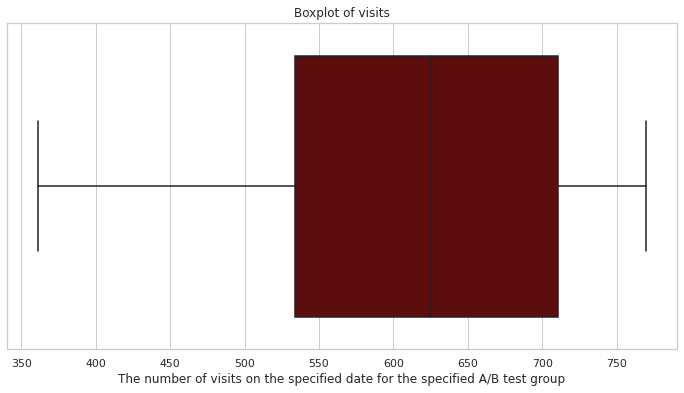

In [53]:
# boxplot of the visits column
sns.set(style="whitegrid", palette="hot")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_visits, x='visits')
plt.title('Boxplot of visits')
plt.xlabel('The number of visits on the specified date for the specified A/B test group')
plt.show()

**Overview do dataframe df_visits:**
- *there are three columns `date`, `group` and `visits`, all have 62 rows*;
- *the `date` column is of type datetime64[ns], the `gruop` column is of type object, the `visits` column is of type int64*;
- *the data type of the `date`column was changed from object to datetime*;
- *there is no big difference between the mean and median in the `visits` column*;
- *no duplicate data in the dataframe*;
- *no missing data in dataframe*;
- *there are no outliers in the `visits` column*

## **Prioritizing Hypotheses**

In [54]:
# calculating ICE and RICE
df_hypotheses['ICE'] = (df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

df_hypotheses['RICE'] = (df_hypotheses['reach'] * df_hypotheses['impact'] * df_hypotheses['confidence']) / df_hypotheses['effort']

df_hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


In [55]:
# showing tables containing ICE and RICE
display(df_hypotheses[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))
display(df_hypotheses[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


,hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


In [56]:
# df_hypotheses, , color='darkred')

*With ICE method, the top 3 hypotheses are:*

1. Hypothesis 9 - **Launch a promotion** that gives users **discounts on their birthdays**
2. Hypothesis 1 - **Add two new channels** for attracting traffic. This will bring **30% more users**
3. Hypothesis 8 - **Add a subscription form** to all the main pages. This will help you **compile a mailing list**

*When we considering the Reach parameter, the list of top 3 change into:*

1. Hypothesis 8 - **Add a subscription form** to all the main pages. This will help you **compile a mailing list**
2. Hypothesis 3 - **Add product recommendation blocks** to the store's site. This will **increase conversion and average purchase size**
3. Hypothesis 1 - **Add two new channels** for attracting traffic. This will bring **30% more users**

*The fifth hypothesis in ICE method came second because it has high reach value of 8. While the top hypothesis was drop into fifth due to its low reach value of 1. Regardless of how powerful the hypothesis, the amount of user that will be influence holds a great impact to consider.*

*After reporting this to our supervisor and discuss it with the team. We have decide to proceed with hypothesis 3. UI/UX team create a product recommendation block and data engineer team collect the user and visit data for a whole month. We will need to analyze the conversion and the average purchase size data to determine if the addition of recommendation block is proven to be succesful.*

## **A/B Testing Analysis**

### Cumulative Income by Group

*Before we dive in right away to the main parameter, we have to look for the cumulative revenue and analyze the chart to prevent peeking problems from occurring.*

*We'll create an array with unique paired date group values using the method: `drop_duplicates()`*

In [57]:
dates_groups = (df_orders[['date','group']].drop_duplicates()) 

dates_groups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


*Let's collect aggregate cumulative daily data related to orders in a few practical steps.*

*In the first part of the code, we will get the rows from the orders table, whose dates are less than or equal to the date of the `dates_groups` element and the test group is the same as in dates_groups.*

*In the second part, we'll aggregate the values. We calculate the maximum value of the date and the group so that we can have a column in our output. Then, we find the unique order quantity and user ID and we calculate the average purchase amount quantity*

*By putting it all together, we'll get:*

In [58]:
orders_aggregated = (dates_groups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], 
                                                                           df_orders['group'] == x['group'])]
                                        .agg({'date' : 'max', 
                                              'group' : 'max', 
                                              'transaction_id' : pd.Series.nunique, 
                                              'visitor_id' : pd.Series.nunique, 
                                              'revenue' : 'sum'}), 
                                        axis=1).sort_values(by=['date','group']))

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,2266.6
66,2019-08-01,B,17,17,967.2
175,2019-08-02,A,42,36,3734.9
173,2019-08-02,B,40,39,3535.3
291,2019-08-03,A,66,60,5550.1


*With this code, we seem to have sorted our test results every day to the current date and stored them in the rows of the `orders_aggregated` table. Let's do something similar to get aggregated daily cumulative data related to visitors:*

In [59]:
visits_aggregated = (dates_groups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], 
                                                                           df_visits['group'] == x['group'])]
                                        .agg({'date' : 'max', 
                                              'group' : 'max', 'visits' : 'sum'}), 
                                        axis=1).sort_values(by=['date','group']))

visits_aggregated.head()

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [60]:
# We need to combine the two tables into one and give the columns a descriptive name:
cumulative_data = (orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group']))

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

cumulative_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


**Column Description:**

- date
- group
- orders — the number of orders on the specified date for the specified group
- buyers — the number of users who placed at least one order on a specified date for a specified group
- revenue — revenue on the specified date for the specified cohort (average purchase amount)
- visits — the number of visitors to the online store on a specified date for the specified group

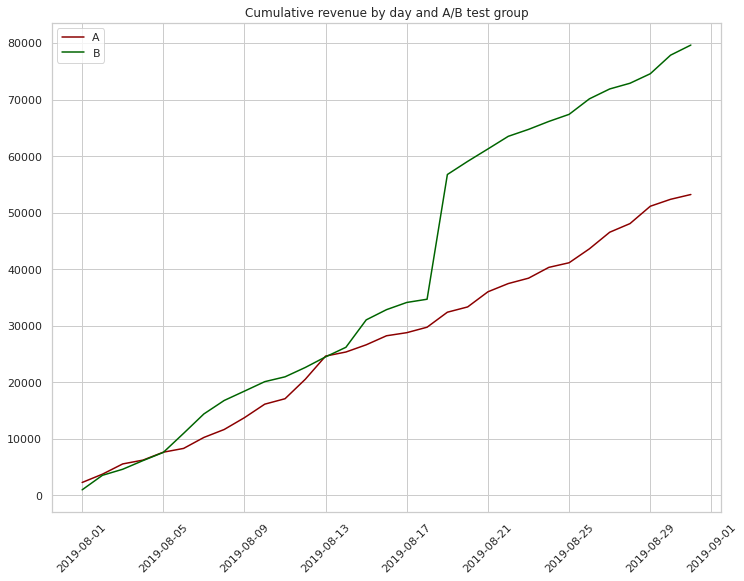

In [61]:
# Let's graph cumulative revenue by day and A/B test group:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 9))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A', color='darkred')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B', color='darkgreen')

plt.title('Cumulative revenue by day and A/B test group')
plt.xticks(rotation=45)
plt.legend() 


*Revenue continued to increase during testing. This is a good sign.*

*Nevertheless, Group B recorded revenue spikes at around 19 August 2019. This may imply a spike in the number of orders or the presence of very expensive orders in the sample. For the next section we will compare the analysis before and after removing the outlier.*

### Cumulative Average Order Size by Group

*Let's plot the average purchase amount by group. We will divide the cumulative revenue by the cumulative number of orders:*

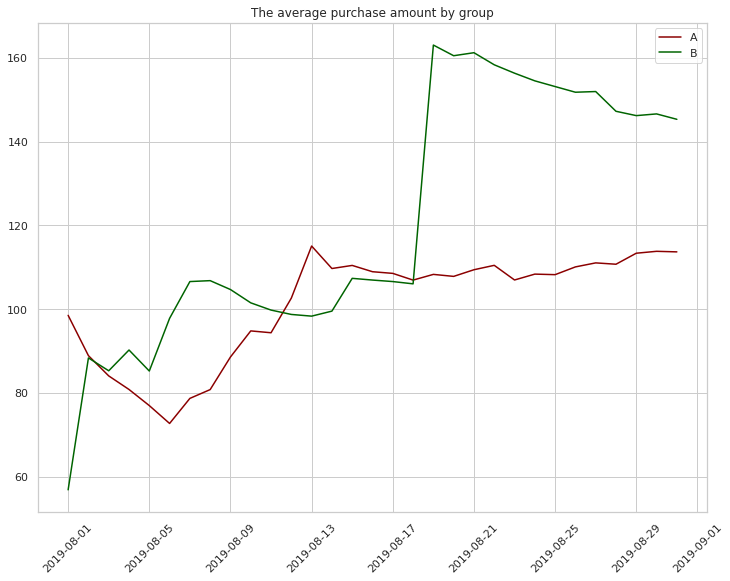

In [62]:
# plotting the average purchase amount by group
plt.figure(figsize=(12, 9))

plt.plot(cumulative_revenue_A['date'], 
         cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], 
         label='A', color='darkred')
plt.plot(cumulative_revenue_B['date'], 
         cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], 
         label='B', color='darkgreen')

plt.title('The average purchase amount by group')
plt.xticks(rotation=45)
plt.legend()

*Same as the previous chart, there is a spike of average purchase amount on 19 August. The average purchase amount was also stable towards the end of the test. We need more data related to this group to find the actual average purchase amount and set the level.*

### Relative Difference of Cumulative Order Size

*Let's graph the relative difference for the average purchase amount. We'll add a horizontal axis with the axhline() method (i.e. a horizontal line that intersects the axis):*

In [63]:
# graphing the relative difference for the average purchase amount
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', 
                                                       right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_revenue.columns = ['date', 'revenue_A', 'orders_A', 'revenue_B', 'orders_B']

merged_cumulative_revenue.head()

,date,revenue_A,orders_A,revenue_B,orders_B
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


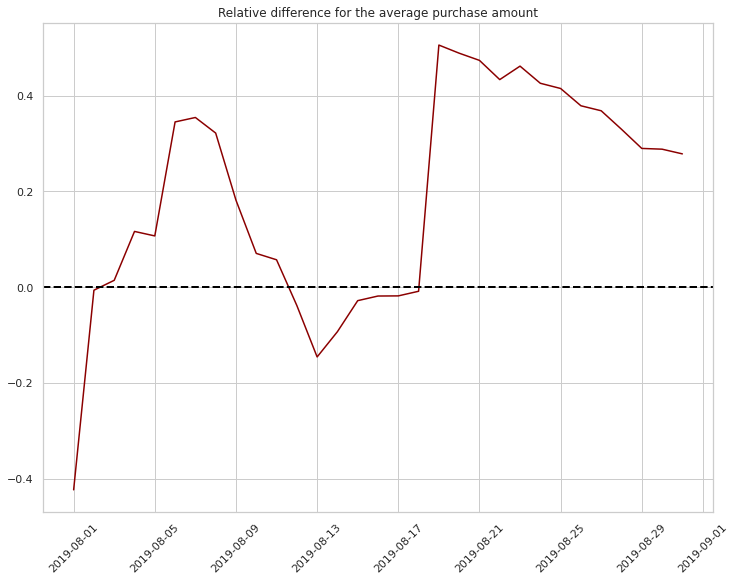

In [64]:
# graphing the relative difference for the average purchase amount
plt.figure(figsize=(12, 9))

plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_B'] / merged_cumulative_revenue['orders_B']) / 
         (merged_cumulative_revenue['revenue_A'] / merged_cumulative_revenue['orders_A']) - 1,
         color='darkred')

plt.title('Relative difference for the average purchase amount')
plt.xticks(rotation=45)

# menambahkan sumbu X
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

*At some point, the difference between the segments increases dramatically. This indicates the presence of large orders and outliers! Let's dig into this later.*

### Conversion Rate

*We will analyze the cumulative conversion chart in the same way. Let's set the axis scale using the `plt.axis()` method, by passing the minimum and maximum X-axis values and the minimum and maximum Y-axis values to the method:*

(18109.0, 18139.0, 0.0, 0.05)

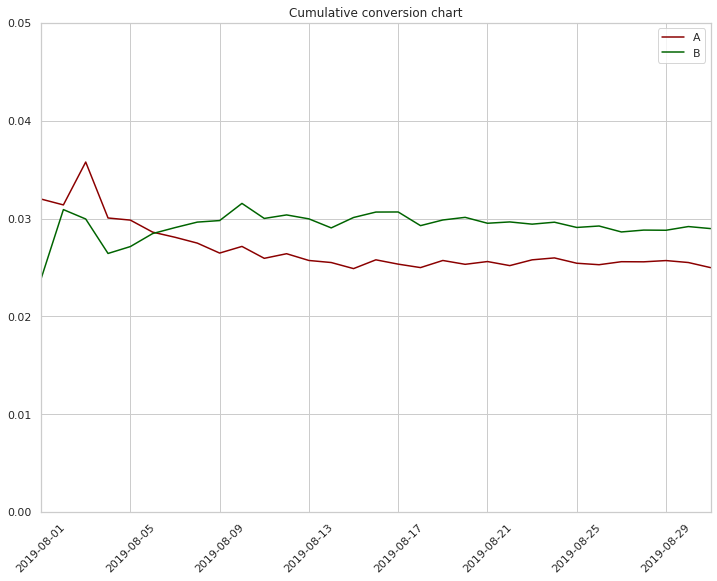

In [65]:
# setting the axis scale using the plt.axis() method
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(12, 9))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A', color='darkred')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B', color='darkgreen')

plt.title('Cumulative conversion chart')
plt.xticks(rotation=45)
plt.legend()

plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0, 0.05])

*Notice how a symetry almost obtained. Such symmetry is rarely encountered in experimental data. Therefore, wherever and whenever you get surprising results, be sure to double-check your code for bugs. If it doesn't exist, this could be a sign that your data can't be trusted. However, in this case, the symmetry is valid and is indeed caused by the experimental method carried out, so you don't have to worry.*

*Meanwhile, for other observations, both groups fluctuated around the same value, but then the conversion rate of group A fell before it stabilized, while the conversion rate of group B rose before finally also stabilizing.*

### Daily Conversion Rates

*Let's graph the relative difference for the cumulative conversion rate:*

In [66]:
# graphing the relative difference for the cumulative conversion rate
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], 
                                                                               left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_conversions.columns = ['date', 'conversion_A', 'conversion_B']

merged_cumulative_conversions.head()

,date,conversion_A,conversion_B
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


(18109.0, 18139.0, -0.5, 0.5)

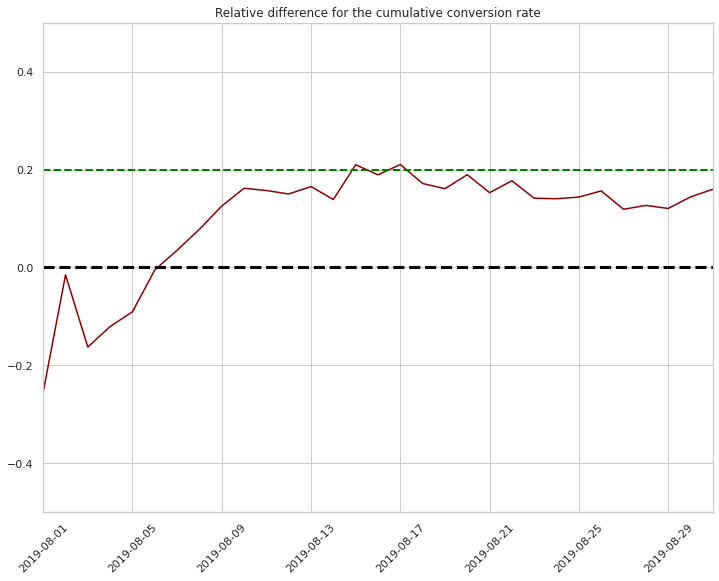

In [90]:
# graphing the relative difference for the cumulative conversion rate
plt.figure(figsize=(12, 9))
plt.plot(merged_cumulative_conversions['date'], 
         merged_cumulative_conversions['conversion_B'] / merged_cumulative_conversions['conversion_A'] - 1, 
         color='darkred')

plt.axhline(y=0, color='black', linestyle='--', linewidth=3)
plt.axhline(y=0.2, color='green', linestyle='--', linewidth=2)

plt.title('Relative difference for the cumulative conversion rate')
plt.xticks(rotation=45)

plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.5, 0.5])

*At the start of the test, Group B was far behind, but unexpectedly managed to take the lead.In general, conversion rates are not stable, so it is too early to complete this test. However, the first thing you need to look out for are anomalies. These unusual events can change the situation, large orders causing distorted groups are rare, random exceptions, not testing hypotheses. Abnormally large orders should be removed from testing. This will be explained in the next section.*

### Number of Order per User

*There is another obstacle that must be overcome: outliers/anomalies that can distort the results of A/B testing. Remember, anomalies are values that appear very rarely in statistical populations, but their occurrence can give rise to errors.*

*In previous section, we have seen how on 19 August there is a spike of revenue. This indicates a huge orders which results in distorted group. However, such orders are rare; they are exceptions that appear randomly, not the result of testing our hypotheses. Such abnormally large orders should be removed from testing.*

*Let's study the scatter plot of order count per user.*

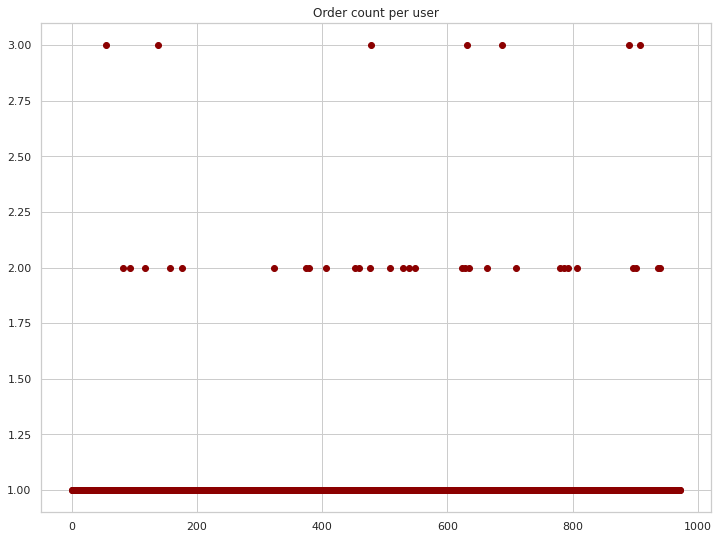

In [68]:
# scatter plot of order count per user
orders_by_users = (df_orders.drop(['group', 'revenue','date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))


orders_by_users.columns = ['visitor_id', 'orders']

x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(12, 9))
plt.title('Order count per user')
plt.scatter(x_values, orders_by_users['orders'], color='darkred')

*We can see that the majority of user make only 1 order. There are indeed many users who place two to four orders. Unfortunately, the exact number of percentages is still unknown, since it is still unclear whether we should consider it an anomaly or not.*

*Next, let's calculate the percentile for the number of orders per user:*

In [69]:
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[1. 2.]


*The number of users who made more than 1 orders did not exceed 5%. Thus, we can set one order per user as the lower limit of the number of orders at once to filter out anomalies.*

[Text(0.5, 1.0, 'Order count per user')]

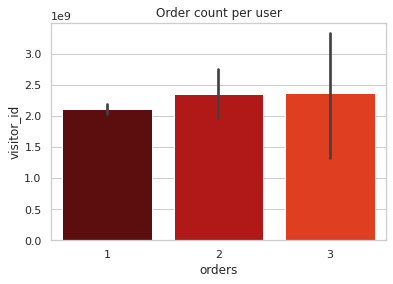

In [70]:
sns.barplot(x='orders', y='visitor_id', data=orders_by_users).set(title='Order count per user')

### Order Revenue

*Let's study the scatter of the order price distribution:*

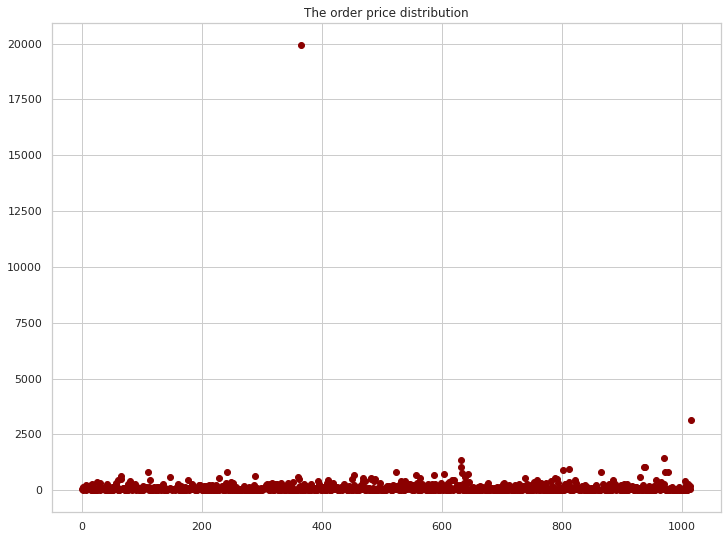

In [71]:
# scatter of the order price distribution
x_values = pd.Series(range(0,len(df_orders['revenue'])))

plt.figure(figsize=(12, 9))
plt.title('The order price distribution')
plt.scatter(x_values, df_orders['revenue'], color='darkred')

*As we predicted, there are some orders that are large in size. Based on the chart above, we can set a limit for abnormal orders, which is above 2,500. However, overall, 1%-5% of the most extreme orders of the observed value will be filtered out.*

*Let's define the 95th, and 99th percentiles for the average order size in our sample:*

In [72]:
print(np.percentile(df_orders['revenue'], [95, 99]))

[414.275 830.3  ]


*The percentage of order cost above 414 is no more than 5%. while fees above 830 are no more than 1%*

### Statistical Significance of Conversion Differences from Raw Data

*Let's find the statistical significance of the differences in conversion rates and order sizes between groups using "raw" data (i.e. data before the removal of anomalies).*

*We're going to create a variable and to store the column. For a user who made at least one order, we will indicate the number of orders made.*

In [73]:
# creating a varible for storing 
orders_by_users_A = df_orders[df_orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_A.columns = ['visitor_id', 'orders']

orders_by_users_A

,visitor_id,orders
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1
...,...,...
440,4227830084,1
441,4237561104,1
442,4243832526,1
443,4259830713,1


In [74]:
# creating a varible for storing 
orders_by_users_B = df_orders[df_orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_by_users_B.columns = ['visitor_id', 'orders']

orders_by_users_B

,visitor_id,orders
0,5114589,1
1,6958315,1
2,39475350,1
3,47206413,1
4,48147722,1
...,...,...
523,4251115836,1
524,4258103007,1
525,4279090005,1
526,4281247801,1


*Now, we need to create a variable sampleA and sampleB, which will load users from different groups and the corresponding order quantity. For those who do not make an order, the value is 0. This is needed to prepare samples for **Mann-Whitney testing**.*

*The main idea behind this test is to rank the two samples in ascending order and compare the rank of values that appear in both samples (i.e. in which position they appear in the sample). If the difference between their ratings is the same from sample to sample, this means that the shift is typical. That is, part of the value is simply added, causing the rest to shift.*

*Nontypical shifts signal a real change. The sum of those ranking shifts (from #1 to #4 means 3, etc.) is the value of the criterion. The higher the number of rank shifts, the higher the probability of difference in the distribution of the two samples. The probability of obtaining various values from the Mann-Whitney test has been calculated theoretically, which allows us to conclude the presence or absence of differences for any degree of significance established.*

*Here, nonparametric methods are helpful, given that they make no guesswork about how the data is distributed (so you don't have to estimate the parameters of the distribution). Such methods are often used when parameters are difficult (or even impossible) to estimate as a result of too many outliers.*

In this particular task for **Mann-Whitney testing** , the steps are:

1. Create a list of the number of orders for each user: `orders_by_users_A['orders']`
2. Create a series of the required length filled with a value of zero for those users who did not make an order: `pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')`
3. Combine the circuit with `pd.concat()`. First of all, we have to pass what needs to be incorporated to the method. In our case, this is a list of the first and second sections. Then, we'll pass an argument indicating that the Series object will be joined by a row (in other words, written sequentially) with the parameter of axis = 0.


In [75]:
# sample for the Mann-Whitney testing
sample_A = (pd.concat([orders_by_users_A['orders'], 
                        pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - 
                                                     len(orders_by_users_A['orders'])), name='orders')], axis=0))

*The same method can be duplicated for `sample B`.*

In [76]:
# sample for the Mann-Whitney testing
sample_B = (pd.concat([orders_by_users_B['orders'], 
                        pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - 
                                                     len(orders_by_users_B['orders'])), name='orders')], axis=0))

*We'll apply the criteria and format the p value by rounding it to three decimal places.*

*Remember that storing a sample of which each element is the number of orders made by a particular user, including zero. So, the number of elements is the number of users, and the total number of all elements is the number of orders. To find out the group conversion rate, we must divide the total number of orders by the number of users. Using the method, we will find the average value for each sample.*

In [77]:
alpha = 0.05
results_1 = st.mannwhitneyu(sample_A, sample_B)
print('p-value: ', results_1.pvalue.round(3))

if (results_1.pvalue < alpha):
    print("The null hypothesis was rejected: the difference was statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")
    
print('Relative conversion gain for group B: ','{0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1))

p-value:  0.011
The null hypothesis was rejected: the difference was statistically significant
Relative conversion gain for group B:  0.160


*Based on the raw data we use, it turns out that there is a significant difference between groups A and B.*

*The first line of the resulting output gives us a p value of 0.011, which is smaller than 0.05. Therefore, we reject the null hypothesis because there is a statistically significant difference in conversion between groups. The relative incline of group B was 16\% (the last line of output).*

### Statistical Significance of Average Order Size Differences from Raw Data

*To calculate the statistical significance of the difference in the segment's average order size, we will pass the revenue data to the criteria.*

*We will also find relative differences in average order sizes between groups.*

In [78]:
results_2 = st.mannwhitneyu(df_orders[df_orders['group'] == 'A']['revenue'], 
                            df_orders[df_orders['group'] == 'B']['revenue'])
print('p-value: ', results_2.pvalue.round(3))

if (results_2.pvalue < alpha):
    print("The null hypothesis was rejected: the difference was statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")
    
print('Relative order size gain for group B: ','{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean() / 
                                                                df_orders[df_orders['group']=='A']['revenue'].mean() - 1))

p-value:  0.862
Failed to reject the null hypothesis: we cannot conclude the difference
Relative order size gain for group B:  0.278


*The p-value is much higher than 0.05, so we cannot reject the null hypothesis and conclude that the average order size between groups is different. However, the average order size for group B is indeed much greater than that of group A.*

### Statistical Significance of Conversion Differences from Filtered Data

*Remember, the 95th and 99th percentiles for the average order size you calculated in the previous section were 414 and 830. Meanwhile, the 95th and 99th percentiles for the number of orders per user are 1 and 2 orders.*

*Let's define an unnatural user (anomaly) as a user who makes more than one orders or order with a value above 414. Thus, we will remove 5% of users with the most number of orders, and 1%-5% of users with the highest order value.*

In [79]:
users_with_many_orders = (pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 1]['visitor_id'], orders_by_users_B[orders_by_users_B['orders'] > 1]['visitor_id']], axis = 0))

print('Users with an order more than 95% of the data:', len(users_with_many_orders), 'users')

Users with an order more than 95% of the data: 36 users


In [80]:
users_with_expensive_orders = df_orders[df_orders['revenue'] > 414]['visitor_id']

print('Users with an order size more than 95% of the data:', len(users_with_expensive_orders),'users')

Users with an order size more than 95% of the data: 51 users


In [81]:
abnormal_users = (pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0).drop_duplicates().sort_values())

print('In total we have', len(abnormal_users), 'unnatural users')

In total we have 86 unnatural users


*Let's find out the impact of their actions on the test results. We will calculate the statistical significance of the conversion differences between groups using filtered data. First of all, we'll set up a sample number of orders per user for each test group:*

In [82]:
sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))]['orders'],
                               pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - 
                                                            len(orders_by_users_A['orders'])), name='orders')], axis=0,)

In [83]:
sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - 
                                     len(orders_by_users_B['orders'])), name='orders')], axis=0,)

*Next, we'll apply Mann-Whitney's statistical criteria to the resulting sample:*

In [84]:
results_3 = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)
print('p-value: ', results_3.pvalue.round(3))

if (results_3.pvalue < alpha):
    print("The null hypothesis was rejected: the difference was statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")
    
print('Relative conversion gain for group B in filtered data: ','{0:.3f}'.format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p-value:  0.016
The null hypothesis was rejected: the difference was statistically significant
Relative conversion gain for group B in filtered data:  0.174


*It turns out that our results remain unchange. There is still a significant difference between groups A and B.*

*The first line of the resulting output gives us a p value of 0.02, which is smaller than 0.05. Therefore, we reject the null hypothesis because there is a statistically significant difference in conversion between groups. The relative incline of group B was increased from 16% to 16.7%*

### Statistical Significance of Average Order Size Differences from Raw Data

*Let's see what happens to the average order size value*

In [85]:
filtered_order_A = df_orders[np.logical_and(df_orders['group'] == 'A', 
                                            np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue']

In [86]:
filtered_order_B = df_orders[np.logical_and(df_orders['group'] == 'B', 
                                            np.logical_not(df_orders['visitor_id'].isin(abnormal_users)))]['revenue']

In [87]:
results_4 = st.mannwhitneyu(filtered_order_A, filtered_order_B)
print('p-value: ', results_4.pvalue.round(3))

if (results_4.pvalue < alpha):
    print("The null hypothesis was rejected: the difference was statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")
    
print('Relative order size gain for group B in filtered data: ','{0:.3f}'.format(filtered_order_B.mean() / filtered_order_A.mean() - 1))


p-value:  0.771
Failed to reject the null hypothesis: we cannot conclude the difference
Relative order size gain for group B in filtered data:  -0.033


*The p-value decreased and now the difference between segments is -3%, not 27.8%. While our general conclusions to this test have not changed, this example shows clearly how anomalies can affect testing A/B results.*

## **Final Conclusions**

**Overview do dataframe df_hypotheses:**

- *The dataframe consists of five columns: `hypothesis`, `reach`, `impact`, `confidence` and `effort`, with 9 rows each, no significant difference between mean and median, no duplicates, missing data, or outliers.*

**Overview do dataframe df_orders:**

- *The dataframe contains five columns: `transaction_id`, `visitor_id`, `date`, `revenue` and `group`, with 1197 rows each, after removing stacked data, now the dataframe has 1016 rows in each column. The columns are of type int64, datetime64[ns], float64, and object. The name of the columns `transactionId` and `visitorId` has been changed, and the `date` column has been converted from object to datetime. No duplicates, missing data, or outliers are found.*

**Overview do dataframe df_visits:**

- *The dataframe contains three columns: `date`, `group`, and `visits`, with 62 rows each. The `date` column has been converted from object to datetime, and there are no outliers in the `visits` column.*

***The conclusions that we can draw from this test are:***

- Either the raw data or the filtered data showed statistically significant differences in terms of conversions between cohorts.
- Neither the raw data nor the filtered data showed any statistically significant differences in terms of average order size between groups.
- A graph showing conversion differences between groups shows that group B's results are better. Which proven by an increase of 16\%.
- A graph showing the difference in average order size between groups shows that group B's results are higher than group A. A presence of anomalies may have skewed the results, but a method to filter this outlier shows that there is a decline of 3\% compared to group A.

*This A/B testing have been done to test hypothesis 3, which is:*

- Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.

*Based on these facts, it can be concluded that this test did go well partially. There is a probability that segment B will get better than segment A. Therefore, we recommend to continue the test for another month so we can get more data.*